# Building Models

This notebook is an interactive scratch pad used to build the tensorflow / keras models for the Image Recognition
layer of the Pokemon agent.

In [18]:
import tensorflow as tf
ks = tf.keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from PIL import Image
import os

In [184]:
data_key_path = "../data_manifest.yaml"
data_path = "../data"

with open(data_key_path, 'r') as yaml_file:
  yaml_data = yaml.load(yaml_file, Loader=yaml.FullLoader)

print(len(yaml_data["images"]))

96


In [185]:
data = []
labels = []

for image_info in yaml_data["images"]:
  if not(("name" in image_info and "menu" in image_info)):
    continue

  file_path = os.path.join(data_path, image_info["name"])
  image = Image.open(file_path)
  image = image.resize((int(image.size[0] / 2), int(image.size[1] / 2)))
  image = image.convert("L")
  data.append(np.array(image))

  labels.append(image_info["menu"])

print(len(data), len(labels))


95 95


In [186]:
df = pd.DataFrame({"Images": data, "Labels": labels})
df["Images"] = df["Images"] / 255

df["Labels"] = df["Labels"].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Images  95 non-null     object
 1   Labels  95 non-null     string
dtypes: object(1), string(1)
memory usage: 1.6+ KB


In [187]:
#Image size
df["Images"][0].shape

(144, 160)

In [188]:
df["m_start"] = df["Labels"] == "start"
df["m_end"] = df["Labels"] == "end"
df["m_pa"] = df["Labels"] == "player_action"
df["m_pi"] = df["Labels"] == "player_item"
df["m_pf"] = df["Labels"] == "player_attack"
df["m_anim"] = df["Labels"] == "animation"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Images   95 non-null     object 
 1   Labels   95 non-null     string 
 2   m_start  95 non-null     boolean
 3   m_end    95 non-null     boolean
 4   m_pa     95 non-null     boolean
 5   m_pi     95 non-null     boolean
 6   m_pf     95 non-null     boolean
 7   m_anim   95 non-null     boolean
dtypes: boolean(6), object(1), string(1)
memory usage: 2.7+ KB


In [189]:
df["Images"].shape

(95,)

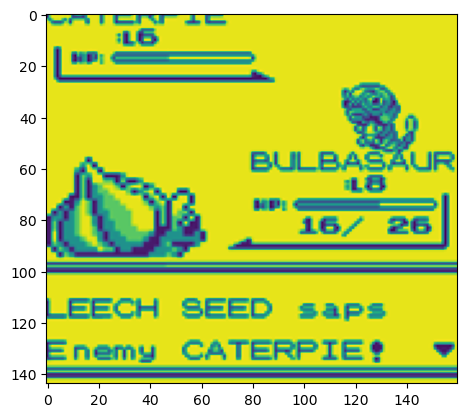

In [190]:
plt.figure()
plt.imshow(df["Images"][0])
plt.show()

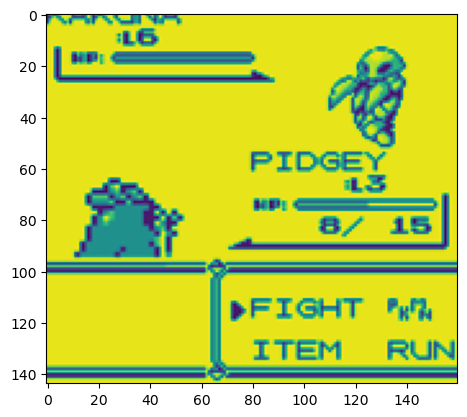

In [191]:
player_turn_images = df[df["m_pa"]].reset_index(drop=True)
plt.figure()
plt.imshow(player_turn_images["Images"][0])
plt.show()

In [192]:
model = ks.Sequential([
  ks.layers.Flatten(input_shape=(144, 160)),
  ks.layers.Dense(1024, activation='relu'),
  ks.layers.Dense(6, activation='softmax')
])

In [193]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [197]:
sparse_labels = df[["m_start", "m_end", "m_pa", "m_pf", "m_pi", "m_anim"]]
sparse_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   m_start  95 non-null     boolean
 1   m_end    95 non-null     boolean
 2   m_pa     95 non-null     boolean
 3   m_pf     95 non-null     boolean
 4   m_pi     95 non-null     boolean
 5   m_anim   95 non-null     boolean
dtypes: boolean(6)
memory usage: 1.2 KB


In [200]:
images_3d = np.stack(df["Images"].to_numpy())
hot_labels = sparse_labels.to_numpy().astype("int")
model.fit(images_3d, hot_labels, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 140ms/step - loss: 0.0910 - accuracy: 0.9474
Epoch 2/10
3/3 [==============================] - 0s 139ms/step - loss: 0.0698 - accuracy: 0.9474
Epoch 3/10
3/3 [==============================] - 0s 139ms/step - loss: 0.1026 - accuracy: 0.9053
Epoch 4/10
3/3 [==============================] - 0s 137ms/step - loss: 0.4307 - accuracy: 0.8526
Epoch 5/10
3/3 [==============================] - 0s 137ms/step - loss: 0.4930 - accuracy: 0.8842
Epoch 6/10
3/3 [==============================] - 0s 139ms/step - loss: 0.8436 - accuracy: 0.6842
Epoch 7/10
3/3 [==============================] - 0s 139ms/step - loss: 1.0437 - accuracy: 0.7368
Epoch 8/10
3/3 [==============================] - 0s 141ms/step - loss: 0.9330 - accuracy: 0.8316
Epoch 9/10
3/3 [==============================] - 0s 142ms/step - loss: 0.6400 - accuracy: 0.7789
Epoch 10/10
3/3 [==============================] - 0s 142ms/step - loss: 0.1344 - accuracy: 0.9053
